In [ ]:
!pip install casadi
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from casadi import MX, vertcat, if_else, sqrt, integrator
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau



In [ ]:
# Definir a seed
seed = 41
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

seed2= 6
np.random.seed(seed2)
random.seed(seed2)
tf.random.set_seed(seed2)



<ipython-input-27-22b38bf8d246>:43: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  stati = fsolve(Estacionario, [1000, 1000])


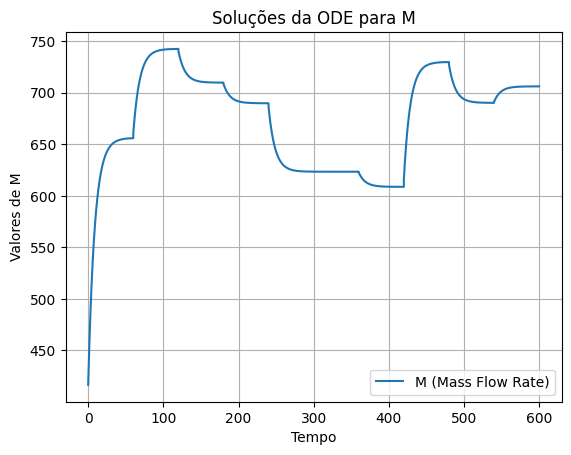

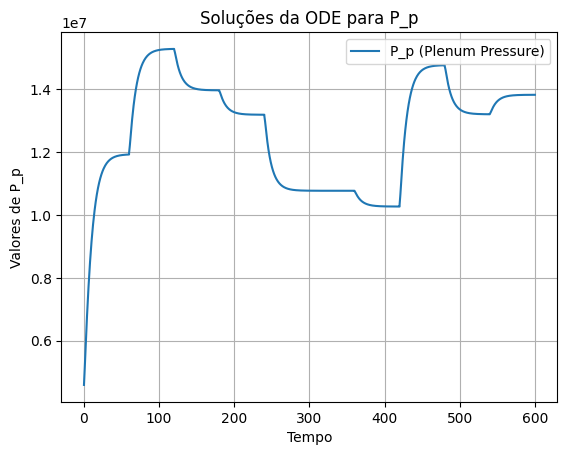

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 - 3s - 400ms/step - loss: 0.4603 - mae: 0.4850 - learning_rate: 0.0010
Epoch 2/1000
8/8 - 0s - 17ms/step - loss: 0.1169 - mae: 0.2487 - learning_rate: 0.0010
Epoch 3/1000


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,learning_rate.
  callback.on_epoch_end(epoch, logs)


8/8 - 0s - 10ms/step - loss: 0.0913 - mae: 0.2103 - learning_rate: 0.0010
Epoch 4/1000
8/8 - 0s - 17ms/step - loss: 0.0465 - mae: 0.1628 - learning_rate: 0.0010
Epoch 5/1000
8/8 - 0s - 8ms/step - loss: 0.0372 - mae: 0.1270 - learning_rate: 0.0010
Epoch 6/1000
8/8 - 0s - 8ms/step - loss: 0.0332 - mae: 0.1230 - learning_rate: 0.0010
Epoch 7/1000
8/8 - 0s - 18ms/step - loss: 0.0270 - mae: 0.1172 - learning_rate: 0.0010
Epoch 8/1000
8/8 - 0s - 10ms/step - loss: 0.0243 - mae: 0.1013 - learning_rate: 0.0010
Epoch 9/1000
8/8 - 0s - 9ms/step - loss: 0.0184 - mae: 0.0958 - learning_rate: 0.0010
Epoch 10/1000
8/8 - 0s - 10ms/step - loss: 0.0179 - mae: 0.0929 - learning_rate: 0.0010
Epoch 11/1000
8/8 - 0s - 9ms/step - loss: 0.0167 - mae: 0.0889 - learning_rate: 0.0010
Epoch 12/1000
8/8 - 0s - 17ms/step - loss: 0.0177 - mae: 0.0885 - learning_rate: 0.0010
Epoch 13/1000
8/8 - 0s - 9ms/step - loss: 0.0140 - mae: 0.0815 - learning_rate: 0.0010
Epoch 14/1000
8/8 - 0s - 11ms/step - loss: 0.0144 - mae: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from casadi import MX, vertcat, integrator, if_else, sqrt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

class P1Generator:
    def __init__(self, seed):
        np.random.seed(seed)
        self.generated_values = set()

    def P1(self):
        while True:
            value = np.random.uniform(400, 500)  # Corrigido para o intervalo desejado
            if value not in self.generated_values:
                self.generated_values.add(value)
                return value


def ale():
  return np.random.uniform(400, 500)
# Instanciando o gerador com uma seed
seed = 42  # Altere a seed conforme necessário
p1_gen = P1Generator(seed)

def Estacionario(X):
    x = X
    A1 = 2.6e-3  # m²
    Lc = 2.0     # m
    alpha = 0.5  # Bar
    P_out = 5.0  # Bar
    C1 = 479.029 # Constante
    nu_P = 2.0   # m³
    K_nu = 0.38  # kg / (kBar^0.5 s)
    phi_value = 1.5  # Valor φ
    z = 0 if x[1] < P_out else np.sqrt(x[1] - P_out)

    dmdt = (A1 / Lc) * (phi_value * 400 - x[0])
    dPdt = ((C1) * (x[0] - alpha * K_nu * z)) / nu_P

    return dmdt, dPdt

stati = fsolve(Estacionario, [1000, 1000])

def Sistemas(x0, P1_value):
    x = MX.sym('x', 2)  #
    p = MX.sym('p')

    # Constantes
    A1 = 2.6e-3  # m²
    Lc = 2.0     # m
    alpha = 0.5  # Bar
    P_out = 5.0  # Bar
    C1 = 479.029 # Constante
    nu_P = 2.0   # m³
    K_nu = 0.38  # kg / (kBar^0.5 s)
    phi_value = 1.5  # φ

    z = if_else(x[1] < P_out, 0, sqrt(x[1] - P_out))

    rhs = vertcat(
        (A1 / Lc) * (phi_value * p - x[0]),
        (C1) * (x[0] - alpha * K_nu * z)
    ) / nu_P

    ode = {'x': x, 'ode': rhs , 'p': p}
    F = integrator('F', 'cvodes', ode, {'tf': 90})

    #
    t_eval = np.linspace(0, 60, 120)
    sol = np.zeros((len(t_eval), 2))
    zeronum = 1e-9

    #
    for i in range(len(t_eval)):
        res = F(x0=x0, p=P1_value)
        x_next = res['xf'].full().flatten()
        sol[i] = x_next

        # Check for steady state
        if np.all(np.abs(x_next - x0) < zeronum):
            sol = sol[:i+1]
            t_eval = t_eval[:i+1]
            break

        # Update initial state
        x0 = x_next

    return sol, P1_value, t_eval

# Loop de geração de dados
def Loop(loops, stati):
    estados = []
    p1_total = []
    t_eval_total = []

    for i in range(loops):
        if i == 0:
            x0 = stati  # Inicializa com o estado estacionário
        else:
            x0 = estados[-1][-1]

        P1_v = p1_gen.P1()
        sol, P1_aleatorio, t_eval = Sistemas(x0, P1_v)
        estados.append(sol)
        p1_total.append(P1_aleatorio)

        # Tempo Total
        if i == 0:
            t_total = t_eval
        else:
            t_total = np.concatenate([t_total, t_total[-1] + t_eval])

    return estados, p1_total, t_total

aaaa, PlotP1, Plott = Loop(10, stati)
bbb = aaaa
Ploty = np.concatenate(aaaa)
M_final = Ploty[:, 0]
P_p_final = Ploty[:, 1]

# Plotar os resultados
plt.figure()
plt.plot(Plott, Ploty[:, 0], label='M (Mass Flow Rate)')
plt.xlabel('Tempo')
plt.ylabel('Valores de M')
plt.title('Soluções da ODE para M')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(Plott, Ploty[:, 1], label='P_p (Plenum Pressure)')
plt.xlabel('Tempo')
plt.ylabel('Valores de P_p')
plt.title('Soluções da ODE para P_p')
plt.legend()
plt.grid(True)
plt.show()

# Dados para treino
M_Ploty = np.vstack(bbb)
t_eval = np.hstack(Plott)
P1_values = np.array(PlotP1)
M = M_Ploty[:, 0]
P_p = M_Ploty[:, 1]

# Entradas e Saídas (Many to Many)
X = np.column_stack((M[:-1], P_p[:-1], np.repeat(P1_values, len(t_eval) // len(P1_values))[:len(M[:-1])]))
y = np.column_stack((M[1:], P_p[1:]))  # Alterado para usar o valor posterior de M e P_p

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Normalizar Dados
X = StandardScaler()
y = StandardScaler()

X_train = X.fit_transform(X_train)
X_test = X.transform(X_test)

y_train = y.fit_transform(y_train)
y_test = y.transform(y_test)


model = keras.Sequential()
model.add(layers.Bidirectional(layers.SimpleRNN(128, return_sequences=False, activation='tanh'), input_shape=(X_train.shape[1], 1))) # Corrected line
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2))


# Configuração do otimizador
optimizer = keras.optimizers.Adam(learning_rate=0.001)



model.compile(optimizer=optimizer,
              loss="mse",
              metrics=["mae"])

checkpoint = ModelCheckpoint('best_model.keras',
                             save_best_only=True,
                             monitor='val_loss',
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(X_train, y_train,
                    epochs=1000,
                    batch_size=128,
                    verbose=2,
                    callbacks=[checkpoint, early_stopping, reduce_lr]
                    )



Ultimo P1: 418.18249672071005
Valores P1:[437.45401188473625, 495.0714306409916, 473.1993941811405, 459.86584841970364, 415.60186404424365, 415.59945203362025, 405.80836121681995, 486.6176145774935, 460.1115011743209, 470.8072577796046]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

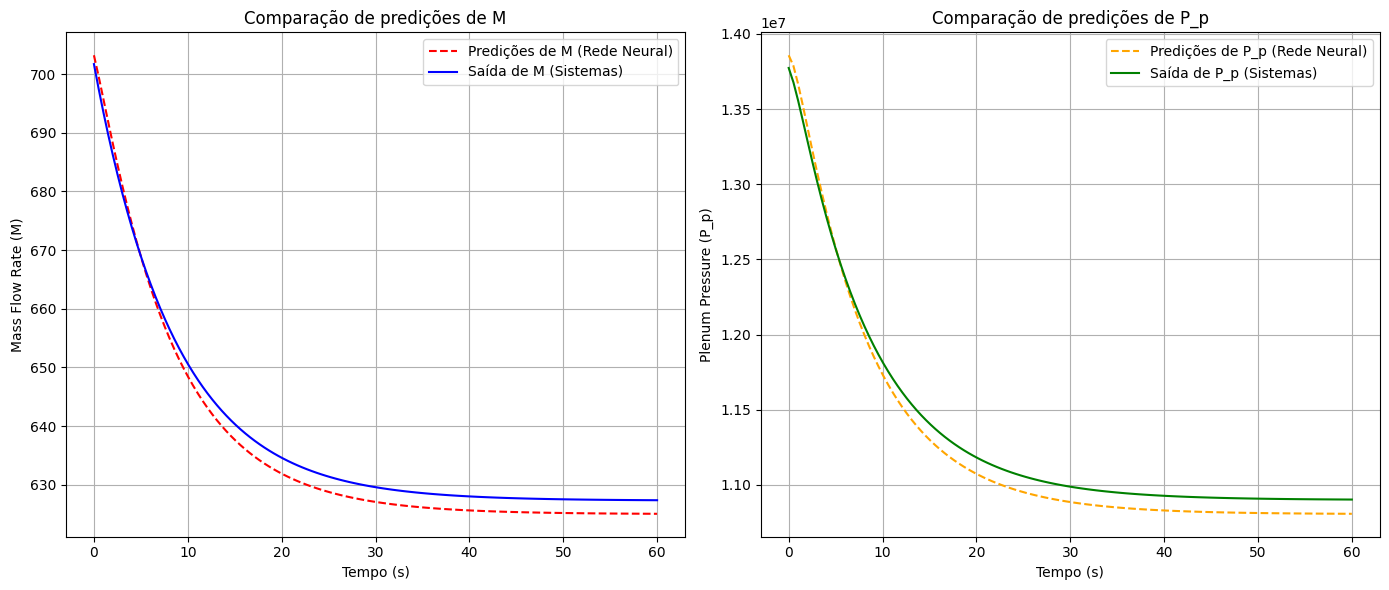

In [ ]:
# Inicializando as listas para armazenar as predições da rede neural
M_predicoes = []
P_p_predicoes = []

# Usar os últimos valores de M e P_p como ponto de partida
M_atual = M[-1]
P_p_atual = P_p[-1]
ultimo_P1 = p1_gen.P1()
print()
print(f"Ultimo P1: {ultimo_P1}")
print(f"Valores P1:{PlotP1}")
# Criar uma sequência de 360 pontos no intervalo de 0 a 30
t_eval = np.linspace(0, 60, 120)

# Iterar para gerar predições consecutivas correspondentes a 360 pontos
for _ in range(120):

    # Criar a entrada com o formato (M_atual, P_p_atual, ultimo_P1)
    entrada = np.array([[M_atual, P_p_atual, ultimo_P1]]) # The original error was caused because M_atual and P_p_atual were 1-D arrays
    entrada_normalizada = X.transform(entrada)

    # Realizar a predição
    predicao = model.predict(entrada_normalizada)
    predicao_original = y.inverse_transform(predicao)

    # Extrair os valores preditos para M e P_p
    M_predito = predicao_original[0, 0]
    P_p_predito = predicao_original[0, 1]
    # Armazenar as predições
    M_predicoes.append(M_predito)
    P_p_predicoes.append(P_p_predito)

    # Atualizar os valores para a próxima iteração
    M_atual = M_predito
    P_p_atual = P_p_predito

# Gerar os valores de saída da função Sistemas
sol_sistemas, _, t_eval_sistemas = Sistemas([M[-1], P_p[-1]], ultimo_P1)
M_sistemas = sol_sistemas[:, 0]
P_p_sistemas = sol_sistemas[:, 1]

# Plotar as previsões e os valores de saída da função Sistemas
plt.figure(figsize=(14, 6))

# Plotagem do M
plt.subplot(1, 2, 1)
plt.plot(t_eval, M_predicoes, label='Predições de M (Rede Neural)', color='red', linestyle='--')
plt.plot(t_eval_sistemas, M_sistemas, label='Saída de M (Sistemas)', color='blue', linestyle='-')
plt.xlabel('Tempo (s)')
plt.ylabel('Mass Flow Rate (M)')
plt.title('Comparação de predições de M')
plt.legend()
plt.grid(True)

# Plotagem do P_p
plt.subplot(1, 2, 2)
plt.plot(t_eval, P_p_predicoes, label='Predições de P_p (Rede Neural)', color='orange', linestyle='--')
plt.plot(t_eval_sistemas, P_p_sistemas, label='Saída de P_p (Sistemas)', color='green', linestyle='-')
plt.xlabel('Tempo (s)')
plt.ylabel('Plenum Pressure (P_p)')
plt.title('Comparação de predições de P_p')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

